# MATH 210 Introduction to Mathematical Computing

**March 10, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Consider a first order differential equuation $y' = f(t,y)$, $y(t_0) = y_0$. Euler's method is the recursive sequence

$$
y_{n+1} = y_n + f(t_n,y_n) (t_{n+1} - t_n)
$$

where $y_n \approx y(t_n)$.

Write a function called `odeEuler` which takes `f`, `t` and `y0`, where

* `f` is a function which represents the right hand side of the equation $y' = f(t,y)$
* `t` is a vector of $t$ values starting at $t_0$
* `y0` is the intial value $y_0$

The function returns a vector `y` of $y$ values given by Euler's method. The length of `y` is the same as the length of `t` since $y_n \approx y(t_n)$.

In [2]:
def odeEuler(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(0,N):
        y[n + 1] = y[n] + f(t[n],y[n])*(t[n + 1] - t[n])
    return y

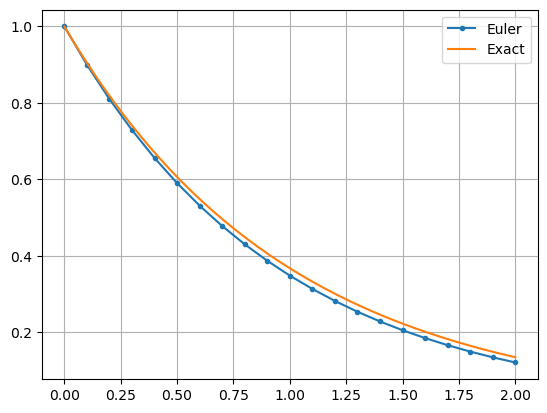

In [6]:
f = lambda t,y: -y
tf = 2
N = 20
t = np.linspace(0,tf,N+1)
y0 = 1
y = odeEuler(f,t,y0)
plt.plot(t,y,'.-')

ts = np.linspace(0,tf,200)
ys = np.exp(-ts)
plt.plot(ts,ys)

plt.legend(["Euler","Exact"]), plt.grid(True)
plt.show()

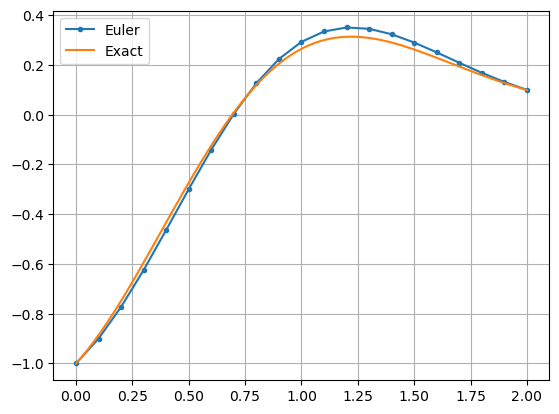

In [8]:
# Example 1.4.1 (DiffyQs)
f = lambda t,y: np.exp(t - t**2) - 2*t*y
tf = 2
N = 20
t = np.linspace(0,tf,N+1)
y0 = -1
y = odeEuler(f,t,y0)
plt.plot(t,y,'.-')

ts = np.linspace(0,tf,200)
ys = np.exp(ts - ts**2) - 2*np.exp(-ts**2)
plt.plot(ts,ys)

plt.legend(["Euler","Exact"]), plt.grid(True)
plt.show()

## Heun's Method

Consider a first order differential equuation $y' = f(t,y)$, $y(t_0) = y_0$. Heun's method is the recursive sequence

$$
\begin{align*}
h &= t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h, y_n + k_1h) \\
y_{n+1} &= y_n + \left( \frac{k_1 + k_2}{2} \right) h
\end{align*}
$$

where $y_n \approx y(t_n)$.

Write a function called `odeHeun` which takes `f`, `t` and `y0`, where

* `f` is a function which represents the right hand side of the equation $y' = f(t,y)$
* `t` is a vector of $t$ values starting at $t_0$
* `y0` is the intial value $y_0$

The function returns a vector `y` of $y$ values given by Heun's method. The length of `y` is the same as the length of `t` since $y_n \approx y(t_n)$.

In [9]:
def odeHeun(f,t,y0):
    N = len(t) - 1
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(0,N):
        h = t[n + 1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h,y[n] + k1*h)
        y[n + 1] = y[n] + (k1 + k2)/2*h
    return y

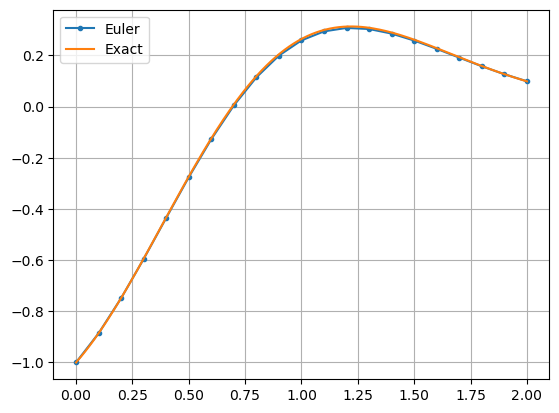

In [11]:
# Example 1.4.1 (DiffyQs)
f = lambda t,y: np.exp(t - t**2) - 2*t*y
tf = 2
N = 20
t = np.linspace(0,tf,N+1)
y0 = -1
y = odeHeun(f,t,y0)
plt.plot(t,y,'.-')

ts = np.linspace(0,tf,200)
ys = np.exp(ts - ts**2) - 2*np.exp(-ts**2)
plt.plot(ts,ys)

plt.legend(["Euler","Exact"]), plt.grid(True)
plt.show()